In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
import rpy2.robjects as robj
import pyreadr
%matplotlib inline
from easydict import EasyDict as edict
from tqdm import tqdm_notebook as tqdm
import sys
import time as Time
import pickle

In [2]:
sys.path.append("/home/huaqingj/MyResearch/dynamicR2py")
from utils import *

In [3]:
robj.r["load"]("/home/huaqingj/MyResearch/dynamicR2py/data/datamatrix3chg6rank.Rdata")

'datamatrix','truematrix','candlist0','trueU'


In [4]:
kappa = 1.53
r = 6 
Lmin = 4

In [10]:
results = []

In [11]:
t0 = Time()
for i in range(100):
    print(f"{i+1}/{100}th")
    Ymat = np.array(robj.r["datamatrix"][i])
    TrueXmat = np.array(robj.r["truematrix"][i])
    d, n = Ymat.shape
    time = np.linspace(0, 2, n)
    dXmat, Xmat = GetBsplienEst(Ymat, time)
    Amat = GetAmat(dXmat, Xmat, time, 4)
    midRes = GetNewEst(dXmat, Xmat, Amat, r=r, is_full=True)
    ndXmat, nXmat = midRes.ndXmat, midRes.nXmat
    finalRes = EGenDy(ndXmat, nXmat, kappa=kappa, Lmin=Lmin, MaxM=10, diag=True)
    tc = Time()
    print(f"The average time is {(tc-t0)/(i+1):.2f}s. The detected result is {finalRes.mbic_ecpts}")
    
    # Save the result
    result = edict()
    result.midRes = midRes
    result.finalRes = finalRes
    result.Amat = Amat
    result.Ymat = Ymat
    result.TrueXmat = TrueXmat 
    result.paras = {"kappa":kappa, "r":r, "Lmin":Lmin}
    results.append(result)

1/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.02it/s]


The average time is 4.24s. The detected result is [ 27  99 144]
2/100th


Main Loop: 100%|██████████| 180/180 [00:04<00:00, 44.67it/s]


The average time is 4.31s. The detected result is [ 49  97 143]
3/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 46.41it/s]


The average time is 4.28s. The detected result is [ 46 100 144]
4/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 49.01it/s]


The average time is 4.22s. The detected result is [ 49  98 130 144]
5/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.71it/s]


The average time is 4.20s. The detected result is [ 51 100 143]
6/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.76it/s]


The average time is 4.20s. The detected result is [ 50  98 143]
7/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.41it/s]


The average time is 4.19s. The detected result is [ 45  99 140]
8/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.72it/s]


The average time is 4.18s. The detected result is [ 49 100 144]
9/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.49it/s]


The average time is 4.18s. The detected result is [ 48  99 142 166]
10/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.52it/s]


The average time is 4.18s. The detected result is [ 47  97 120 144]
11/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 100.81it/s]


The average time is 4.17s. The detected result is [ 49  99 141 148]
12/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.91it/s]


The average time is 4.16s. The detected result is [ 48  98 144]
13/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 45.15it/s]


The average time is 4.18s. The detected result is [ 49  99 143]
14/100th


Main Loop: 100%|██████████| 180/180 [00:04<00:00, 43.07it/s]


The average time is 4.20s. The detected result is [ 42  99 143]
15/100th


Main Loop: 100%|██████████| 180/180 [00:04<00:00, 42.80it/s]


The average time is 4.23s. The detected result is [ 98 144]
16/100th


Main Loop: 100%|██████████| 180/180 [00:04<00:00, 43.61it/s]


The average time is 4.24s. The detected result is [ 48  98 146]
17/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.99it/s]


The average time is 4.23s. The detected result is [ 50  98 139]
18/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.48it/s]


The average time is 4.23s. The detected result is [ 46  96 145]
19/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.91it/s]


The average time is 4.22s. The detected result is [ 31 101 144]
20/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.20it/s]


The average time is 4.21s. The detected result is [ 48  98 145 154]
21/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.09it/s]


The average time is 4.21s. The detected result is [ 30  97 141]
22/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.14it/s]


The average time is 4.20s. The detected result is [ 13  99 142 166]
23/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 46.30it/s]


The average time is 4.21s. The detected result is [ 49  97 144]
24/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.50it/s]


The average time is 4.20s. The detected result is [ 49  95 145]
25/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 45.38it/s]


The average time is 4.21s. The detected result is [ 45  93 144]
26/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.09it/s]


The average time is 4.20s. The detected result is [ 49  97 145]
27/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.89it/s]


The average time is 4.20s. The detected result is [ 51  96 143]
28/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 45.48it/s]


The average time is 4.20s. The detected result is [ 49  97 143]
29/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 45.55it/s]


The average time is 4.21s. The detected result is [ 45  97 145]
30/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 45.71it/s]


The average time is 4.21s. The detected result is [ 21  98 144]
31/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 46.24it/s]


The average time is 4.21s. The detected result is [ 51  99 144]
32/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.72it/s]


The average time is 4.21s. The detected result is [ 89 128 146]
33/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.96it/s]


The average time is 4.20s. The detected result is [ 45 100 143 162]
34/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.23it/s]


The average time is 4.20s. The detected result is [ 47 101 145]
35/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.97it/s]


The average time is 4.20s. The detected result is [ 98 143]
36/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.10it/s] 


The average time is 4.19s. The detected result is [ 44  98 142 168]
37/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.11it/s]


The average time is 4.19s. The detected result is [ 48  99 146]
38/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.86it/s]


The average time is 4.19s. The detected result is [ 49  98 141]
39/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.58it/s]


The average time is 4.19s. The detected result is [ 49  99 145]
40/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.83it/s]


The average time is 4.19s. The detected result is [ 49  99 143]
41/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.22it/s]


The average time is 4.18s. The detected result is [ 20  52 100 145]
42/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.89it/s]


The average time is 4.18s. The detected result is [ 49 100 142]
43/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.05it/s]


The average time is 4.18s. The detected result is [ 46  98 142]
44/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.64it/s]


The average time is 4.18s. The detected result is [ 50  98 142]
45/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.77it/s]


The average time is 4.18s. The detected result is [ 47 100 144]
46/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.05it/s]


The average time is 4.18s. The detected result is [ 47  97 144]
47/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.35it/s]


The average time is 4.17s. The detected result is [ 26  99 145]
48/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.86it/s]


The average time is 4.17s. The detected result is [ 50  97 145]
49/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.73it/s]


The average time is 4.17s. The detected result is [100 132 144]
50/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.30it/s]


The average time is 4.17s. The detected result is [ 49 100 143]
51/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.68it/s]


The average time is 4.17s. The detected result is [ 49  99 141]
52/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.53it/s]


The average time is 4.17s. The detected result is [ 46  97 142]
53/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.51it/s]


The average time is 4.17s. The detected result is [ 50  97 135 144]
54/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.42it/s]


The average time is 4.17s. The detected result is [ 15  48  98 143]
55/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.55it/s]


The average time is 4.17s. The detected result is [ 47  96 144]
56/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.55it/s]


The average time is 4.17s. The detected result is [ 47  99 144]
57/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.91it/s]


The average time is 4.16s. The detected result is [ 42 100 144]
58/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.62it/s]


The average time is 4.16s. The detected result is [ 52  97 145]
59/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.02it/s]


The average time is 4.16s. The detected result is [ 29  99 145]
60/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.80it/s]


The average time is 4.16s. The detected result is [ 51  95 144]
61/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.86it/s]


The average time is 4.16s. The detected result is [ 50  97 142 168]
62/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.63it/s]


The average time is 4.16s. The detected result is [ 50  99 116 145]
63/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.80it/s]


The average time is 4.16s. The detected result is [ 47 100 142]
64/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.82it/s]


The average time is 4.16s. The detected result is [ 49  98 139]
65/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.54it/s]


The average time is 4.16s. The detected result is [ 30  99 139 146]
66/100th


Main Loop: 100%|██████████| 180/180 [00:04<00:00, 43.82it/s]


The average time is 4.16s. The detected result is [ 48  99 138 146]
67/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.01it/s]


The average time is 4.16s. The detected result is [ 48  99 144]
68/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 45.50it/s]


The average time is 4.16s. The detected result is [ 45  99 145]
69/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.95it/s]


The average time is 4.16s. The detected result is [ 99 144]
70/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.60it/s]


The average time is 4.16s. The detected result is [ 50  98 125 144]
71/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.44it/s]


The average time is 4.16s. The detected result is [ 49  98 145]
72/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.91it/s]


The average time is 4.16s. The detected result is [ 25  98 145]
73/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.32it/s]


The average time is 4.16s. The detected result is [ 49  99 145]
74/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.33it/s]


The average time is 4.16s. The detected result is [ 48  97 144]
75/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.32it/s]


The average time is 4.16s. The detected result is [ 49  99 144]
76/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.94it/s]


The average time is 4.16s. The detected result is [ 48  98 145]
77/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.55it/s]


The average time is 4.16s. The detected result is [ 48  98 141 173]
78/100th


Main Loop: 100%|██████████| 180/180 [00:04<00:00, 43.89it/s]


The average time is 4.16s. The detected result is [ 50  99 142 171]
79/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.81it/s]


The average time is 4.16s. The detected result is [ 48  99 145]
80/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.21it/s]


The average time is 4.16s. The detected result is [ 47  96 144]
81/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.02it/s]


The average time is 4.16s. The detected result is [ 46  99 144]
82/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.68it/s]


The average time is 4.16s. The detected result is [ 46  97 144]
83/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.63it/s]


The average time is 4.16s. The detected result is [ 50  99 144]
84/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.59it/s]


The average time is 4.16s. The detected result is [ 44  99 143 170]
85/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.81it/s]


The average time is 4.16s. The detected result is [ 48  99 145]
86/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.85it/s]


The average time is 4.16s. The detected result is [ 47  97 144]
87/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.34it/s]


The average time is 4.16s. The detected result is [ 50  95 144]
88/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.48it/s]


The average time is 4.16s. The detected result is [ 49 100 144]
89/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.37it/s]


The average time is 4.16s. The detected result is [ 31  99 145]
90/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.94it/s]


The average time is 4.16s. The detected result is [ 49  98 142 168]
91/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.63it/s]


The average time is 4.16s. The detected result is [100 142 172]
92/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.88it/s]


The average time is 4.16s. The detected result is [ 13  51  99 144]
93/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.43it/s]


The average time is 4.16s. The detected result is [ 48  98 145]
94/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.02it/s]


The average time is 4.16s. The detected result is [ 48  99 137]
95/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.14it/s]


The average time is 4.16s. The detected result is [ 49  98 144]
96/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.96it/s]


The average time is 4.16s. The detected result is [ 46  97 145]
97/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.54it/s]


The average time is 4.16s. The detected result is [ 50  98 142]
98/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 47.38it/s]


The average time is 4.16s. The detected result is [ 92 144]
99/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.54it/s]


The average time is 4.16s. The detected result is [ 49  94 142 162]
100/100th


Main Loop: 100%|██████████| 180/180 [00:03<00:00, 48.20it/s]

The average time is 4.15s. The detected result is [ 49  96 119 144]


In [12]:
with open(f"./results/simu100.pkl", "wb") as f:
    pickle.dump(results, f)

In [13]:
with open(f"./results/simu100.pkl", "rb") as f:
    results = pickle.load(f)

### Plot the change points and the MBIC

In [56]:
# obtain the change points for 100 simulations
chgptss = [result.finalRes.mbic_ecpts for result in results]
#chgptss = [result.finalRes.chgMat[2, :3] for result in results]

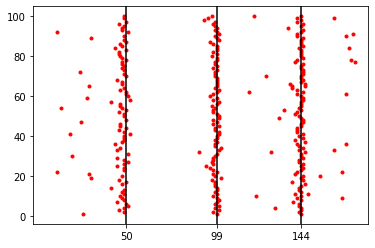

In [57]:
simuIdx = []
pos = []
for idx, chgpts in enumerate(chgptss):
    pos += list(chgpts)
    simuIdx += ([idx+1]*len(chgpts))
plt.plot(pos, simuIdx, ".", color="red")
plt.xlim([0, 180])
plt.xticks([50, 99, 144], [50, 99, 144])
plt.axvline([50], color="black")
plt.axvline([99], color="black")
plt.axvline([144], color="black")

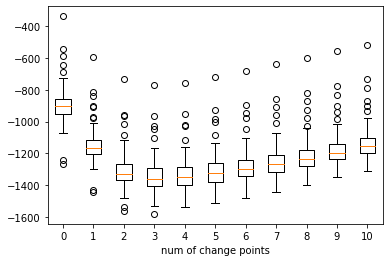

In [49]:
mbicss = [result.finalRes.U for result in results]
mbicss = np.array(mbicss)
plt.boxplot(mbicss)
plt.xlabel("num of change points")
_ = plt.xticks(list(range(1, 12)), list(range(11)))

In [50]:
chgptss

[array([ 27,  99, 144]),
 array([ 49,  97, 143]),
 array([ 46, 100, 144]),
 array([ 49,  98, 130, 144]),
 array([ 51, 100, 143]),
 array([ 50,  98, 143]),
 array([ 45,  99, 140]),
 array([ 49, 100, 144]),
 array([ 48,  99, 142, 166]),
 array([ 47,  97, 120, 144]),
 array([ 49,  99, 141, 148]),
 array([ 48,  98, 144]),
 array([ 49,  99, 143]),
 array([ 42,  99, 143]),
 array([ 98, 144]),
 array([ 48,  98, 146]),
 array([ 50,  98, 139]),
 array([ 46,  96, 145]),
 array([ 31, 101, 144]),
 array([ 48,  98, 145, 154]),
 array([ 30,  97, 141]),
 array([ 13,  99, 142, 166]),
 array([ 49,  97, 144]),
 array([ 49,  95, 145]),
 array([ 45,  93, 144]),
 array([ 49,  97, 145]),
 array([ 51,  96, 143]),
 array([ 49,  97, 143]),
 array([ 45,  97, 145]),
 array([ 21,  98, 144]),
 array([ 51,  99, 144]),
 array([ 89, 128, 146]),
 array([ 45, 100, 143, 162]),
 array([ 47, 101, 145]),
 array([ 98, 143]),
 array([ 44,  98, 142, 168]),
 array([ 48,  99, 146]),
 array([ 49,  98, 141]),
 array([ 49,  99, 14